In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Data paths
train_dir = '/content/drive/MyDrive/CowDisease/train'
val_dir = '/content/drive/MyDrive/CowDisease/validate'
test_dir = '/content/drive/MyDrive/CowDisease/test'

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Data generators
batch_size = 16
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the number of disease classes
num_classes = 4  # Adjust this based on the actual number of disease classes

# Create a base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Evaluate on the test set
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print("Test accuracy:", test_acc)


Found 1335 images belonging to 4 classes.
Found 1335 images belonging to 4 classes.
94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/20
83/83 [==============================] - 1397s 16s/step - loss: 1.1275 - accuracy: 0.6323 - val_loss: 179.1165 - val_accuracy: 0.2252
Epoch 2/20
83/83 [==============================] - 35s 417ms/step - loss: 0.7580 - accuracy: 0.7407 - val_loss: 3.1301 - val_accuracy: 0.2357
Epoch 3/20
83/83 [==============================] - 37s 451ms/step - loss: 0.5675 - accuracy: 0.7968 - val_loss: 1.4108 - val_accuracy: 0.2944
Epoch 4/20
83/83 [==============================] - 34s 415ms/step - loss: 0.4768 - accuracy: 0.8522 - val_loss: 9.7757 - val_accuracy: 0.3163
Epoch 5/20
83/83 [==============================] - 34s 412ms/step - loss: 0.3825 - accuracy: 0.8734 - val_loss: 1.8254 - val_accuracy: 0.2252
Epoch 6/20
83/83 [==============================] - 39s 465ms/step - loss: 0.3086 - accuracy: 0.8976 - val_loss: 4.0603 - val_accuracy

In [ ]:
# ... (Previous code for model training)

# Save the trained model
model.save('trained_disease_model.h5')

print("Model saved successfully.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


Found 1335 images belonging to 4 classes.
83/83 [==============================] - 9s 99ms/step - loss: 1.3444 - accuracy: 0.7380
Test accuracy: 0.7379518151283264


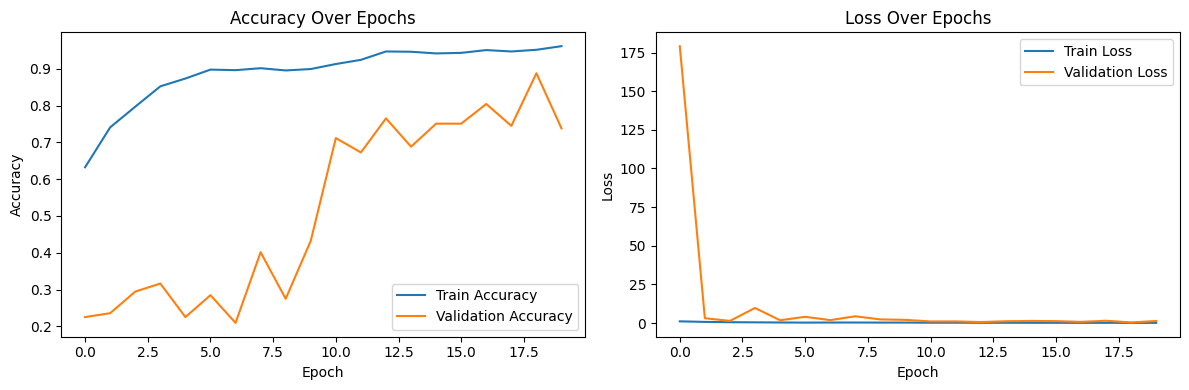

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/trained_disease_model.h5')

# Data paths
test_dir = '/content/drive/MyDrive/CowDisease/test'

# Data preprocessing
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Data generator
batch_size = 16
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the loaded model on the test set
test_loss, test_acc = loaded_model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print("Test accuracy:", test_acc)

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


Found 1335 images belonging to 4 classes.
84/84 [==============================] - 9s 100ms/step


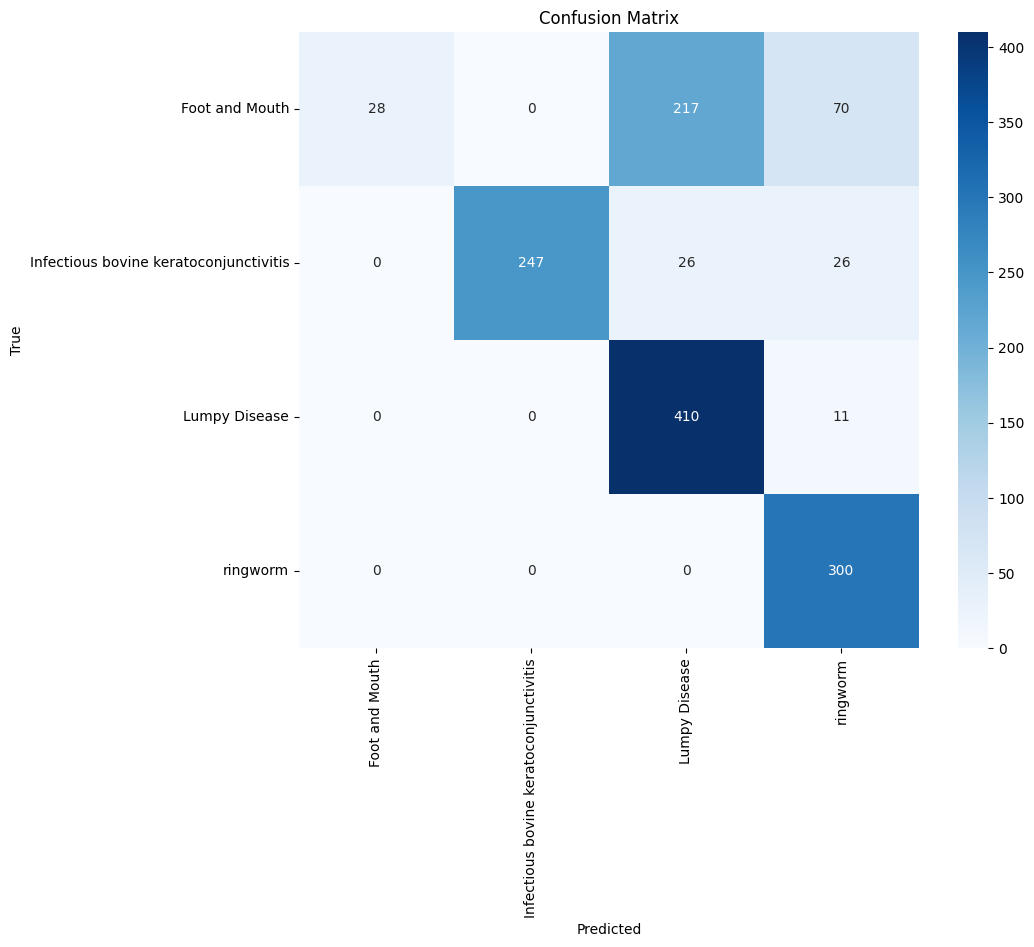

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/trained_disease_model.h5')

# Data paths
test_dir = '/content/drive/MyDrive/CowDisease/test'

# Data preprocessing
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Data generator
batch_size = 16
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep the order of images to match the predictions
)

# Predict classes for the test set
predictions = loaded_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Define class labels
class_labels = list(test_generator.class_indices.keys())

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Found 1335 images belonging to 4 classes.
84/84 [==============================] - 9s 97ms/step


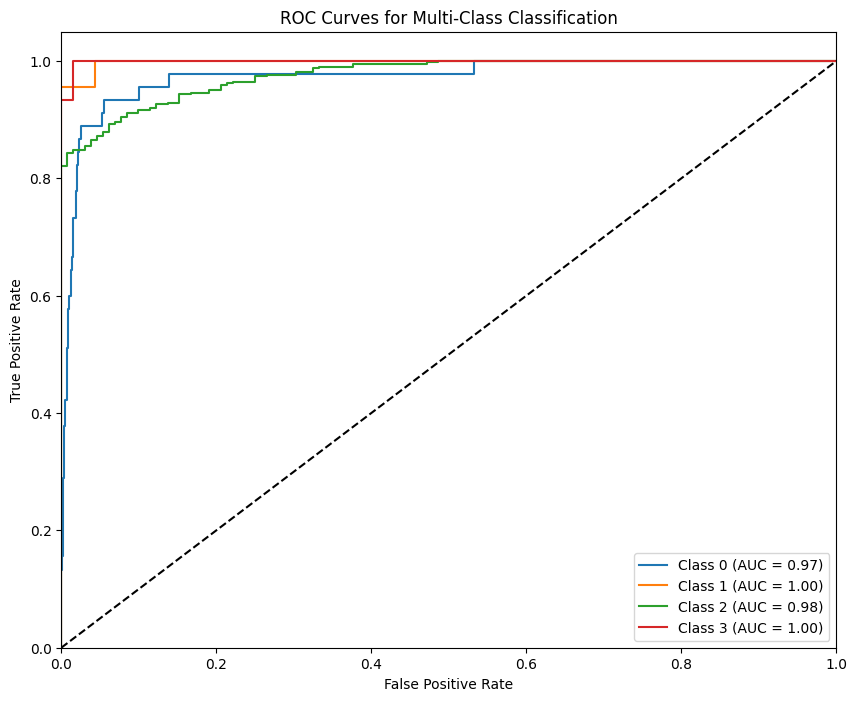

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/trained_disease_model.h5')

# Data paths
test_dir = '/content/drive/MyDrive/CowDisease/test'

# Data preprocessing
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Data generator
batch_size = 16
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep the order of images to match the predictions
)

# Get true labels and predicted probabilities
true_classes = test_generator.classes
predictions = loaded_model.predict(test_generator)

# Calculate ROC curves and AUCs for each class
fpr = {}
tpr = {}
roc_auc = {}
num_classes = len(test_generator.class_indices)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes, predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


Found 1335 images belonging to 4 classes.
84/84 [==============================] - 9s 87ms/step


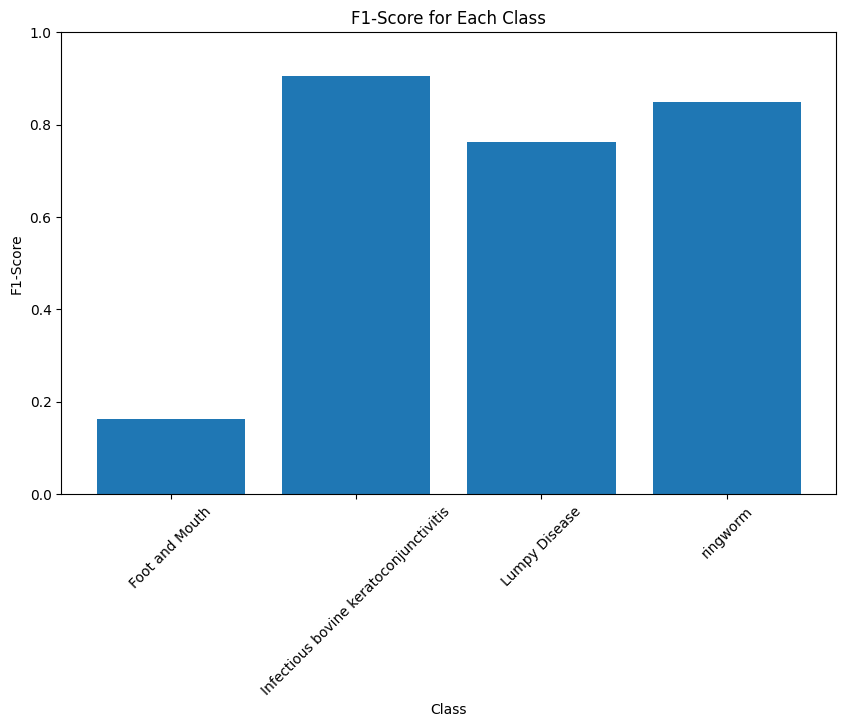

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/trained_disease_model.h5')

# Data paths
test_dir = '/content/drive/MyDrive/CowDisease/test'

# Data preprocessing
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Data generator
batch_size = 16
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep the order of images to match the predictions
)

# Get true labels and predicted probabilities
true_classes = test_generator.classes
predictions = loaded_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate F1-score for each class
f1_scores = []
num_classes = len(test_generator.class_indices)
for i in range(num_classes):
    f1 = f1_score(true_classes, predicted_classes, labels=[i], average=None)
    f1_scores.append(f1[0])

# Plot F1-score for each class
plt.figure(figsize=(10, 6))
plt.bar(range(num_classes), f1_scores)
plt.xticks(range(num_classes), labels=test_generator.class_indices.keys(), rotation=45)
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score for Each Class')
plt.ylim([0, 1])
plt.show()


1/1 [==============================] - 1s 954ms/step


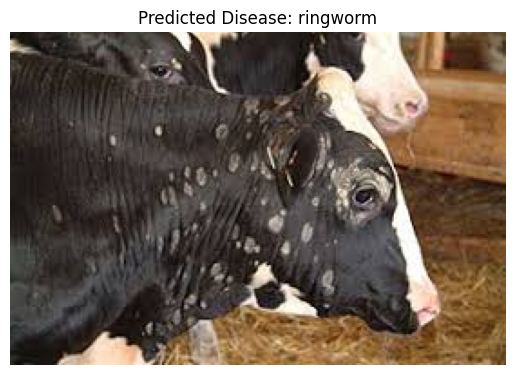

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/trained_disease_model.h5')

# Function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Function to predict disease given an image
def predict_disease(image_path):
    img = preprocess_image(image_path)
    prediction = loaded_model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# Map the predicted class to its respective disease
class_to_disease = {
    0: 'Foot and Mouth',
    1: 'Infectious bovine keratoconjunctivitis',
    2: 'Lumpy Disease',
    3: 'ringworm'
}  # Update with the actual disease names

# Provide a sample image for prediction
sample_image_path = '/content/drive/MyDrive/CowDisease/validate/ringworm/Ringworm -16.jpg'  # Replace with the actual image path

# Predict the disease for the sample image
predicted_class = predict_disease(sample_image_path)

# Check if the predicted class exists in our mapping
if predicted_class in class_to_disease:
    predicted_disease = class_to_disease[predicted_class]
else:
    predicted_disease = 'No match found'

# Display the image and predicted disease
img = image.load_img(sample_image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Disease: {predicted_disease}')
plt.show()
